# Imports

In [1]:
import sys
import numpy as np

In [2]:
from src.convolution import step_function, step_functions, function_norm, convolution_integrand, convolution
from src.spectrum import Spectrum, from_str, from_csv, SpectrumValueType
from src.paths import project_dir

In [3]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.9.8


# Step function

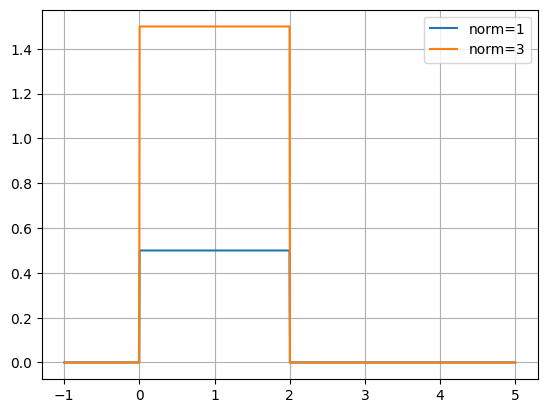

In [5]:
xvalues = np.linspace(start=-1, stop=5, num=1000)
yvalues = step_functions(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="norm=1")
ax.plot(xvalues, step_functions(xvalues, norm=3), label="norm=3")
ax.grid();
ax.legend();

## Norm

In [6]:
function_norm(step_function, lower_limit=-1, upper_limit=3)

1.0

In [7]:
function_norm(step_function, lower_limit=-1, upper_limit=3, args=(5,))

5.0

## Convolution

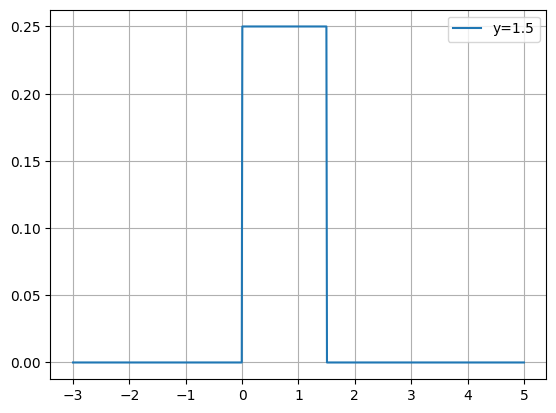

In [8]:
y = 1.5
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

In [9]:
convolution_integrand(step_function)(t=0, y=0, kwargs={'norm': 5, 'lower': -0.5, 'upper': 0.5})

25.0

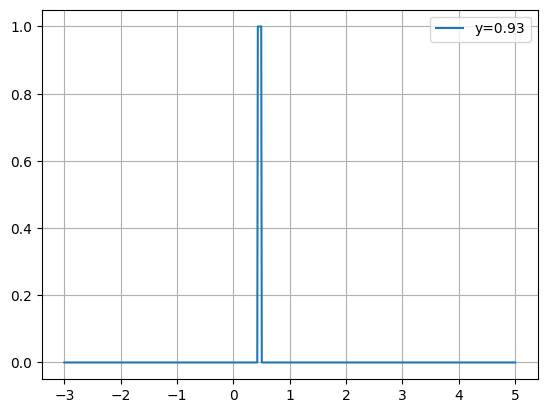

In [10]:
y = 0.93
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y, kwargs={'norm': 1, 'lower': -0.5, 'upper': 0.5}) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

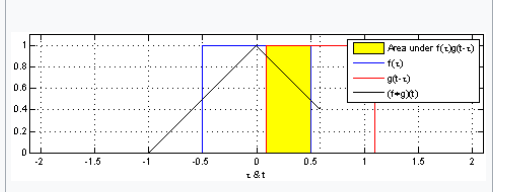
From https://en.wikipedia.org/wiki/Convolution

### On a road to proper integration procedure

c:\users\legion\workspace\microdosimetric_spectra_folding\src\convolution.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(func=integrand, a=lower_limit, b=upper_limit, args=(y, integrand_args), *args, **kwargs)


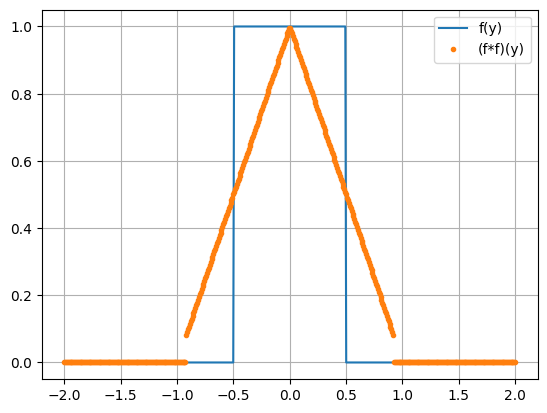

In [11]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=500)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

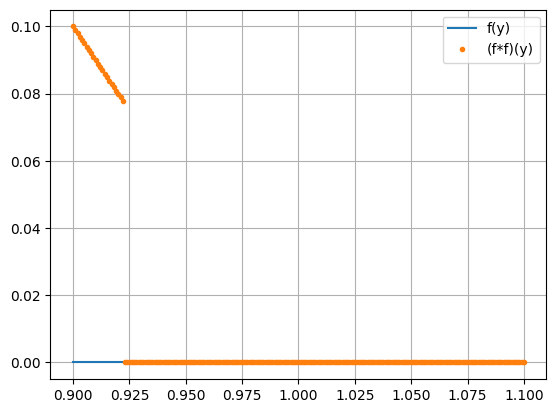

In [12]:
# plotting limits, lets zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

In [13]:
# lets investigate one point
y = 0.95
step_function_args = (1,-0.5,0.5,0)
c, abserr = convolution(step_function, kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.0, 0.0)

In [14]:
# lets investigate one point, now with some tricks
y = 0.95

# replace zero with sys.float_info.min
step_function_args = (1,-0.5,0.5,sys.float_info.min) 

# add more points to the integral covering the expected domain
expected_conv_domain = (-1,1)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}

# integrate the step function over explicit domain
convolution_integration_limits = (-100,100)

c, abserr = convolution(
    step_function, 
    lower_limit=convolution_integration_limits[0],
    upper_limit=convolution_integration_limits[1],
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.050000000000000086, 5.551115123125793e-17)

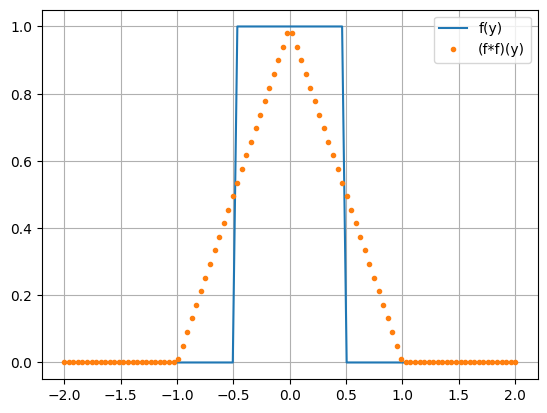

In [15]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=100)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

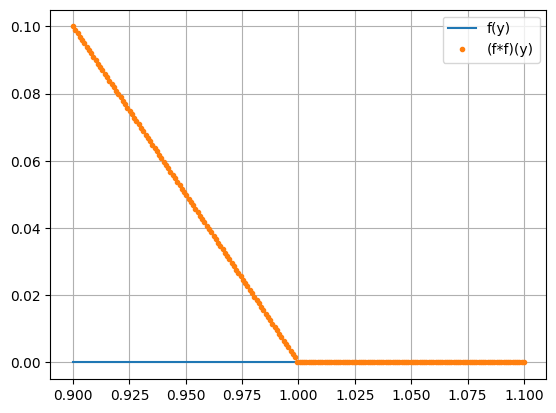

In [16]:
# and a zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

# Spectrum

In [17]:
spectrum = from_csv(project_dir / 'data' / 'interim' / 'data.csv', delimiter=',', value_type=SpectrumValueType.yfy)
spectrum.norm

0.9938634018608192

In [18]:
pdf_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function, lower_limit=spectrum.bin_edges[0], upper_limit=spectrum.bin_edges[-1])

c:\users\legion\workspace\microdosimetric_spectra_folding\src\convolution.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(func=func, a=lower_limit, b=upper_limit, args=args)


0.9869146323628226

In [19]:
pdf_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function)

0.9936501237378954

In [20]:
function_norm(spectrum.bin_value, args=(SpectrumValueType.fy,))

0.9936501237378954